# Feature Reduction for Multivariate Time Series Data


In this notebook, we will explain how to use MetricSifter for feature reduction.

In [1]:
%reload_ext autoreload
%autoreload 2


We prepare the synthetic data simulating a failure by injecting anomalies.

In [40]:
import pandas as pd

from tests.sample_gen.generator import generate_synthetic_data

normal_data, abonormal_data, _, _, _ = generate_synthetic_data(num_node=20, num_edge=20, num_normal_samples=60, num_abnormal_samples=20, anomaly_type=0)
data = pd.concat([normal_data, abonormal_data], axis=0, ignore_index=True)


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

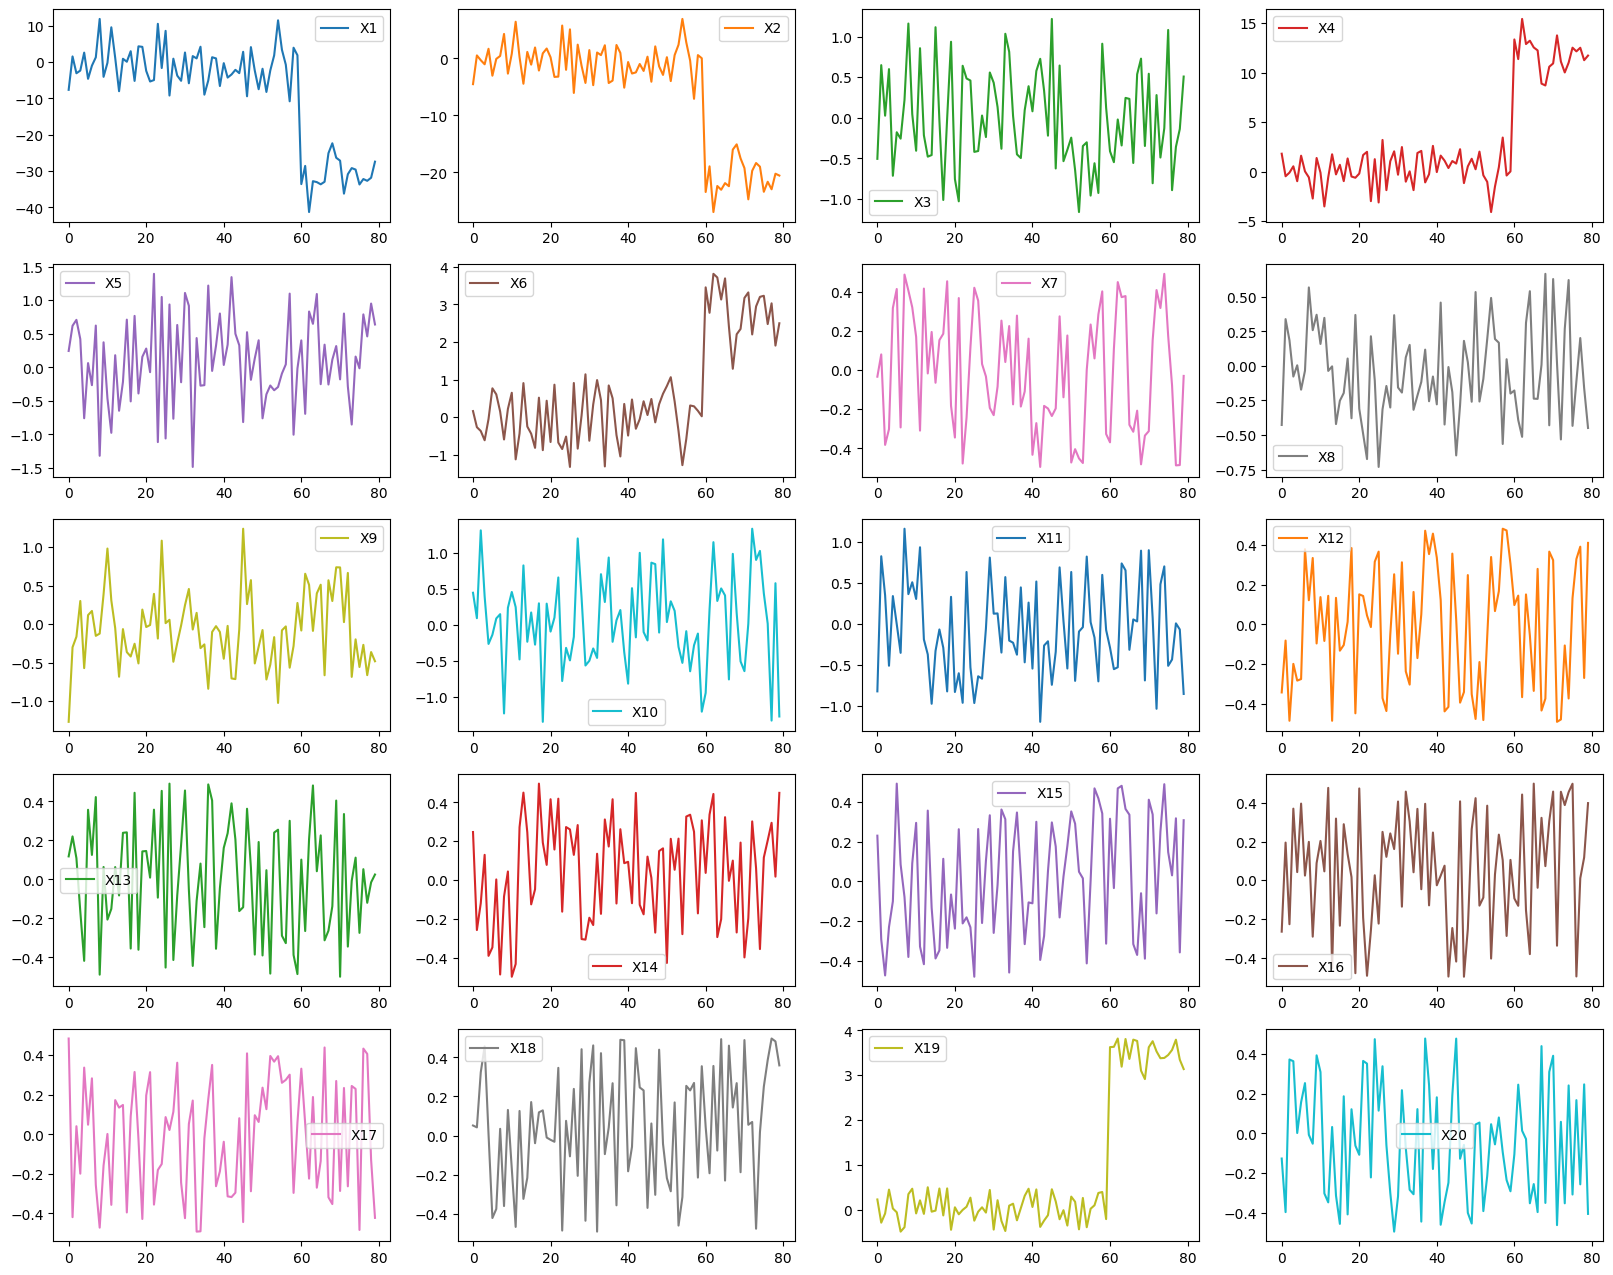

In [49]:
data.plot(subplots=True, figsize=(20, 16), kind='line', layout=(5, 4), sharex=False, sharey=False)


We remove monitoring metrics with Sifter module.

removed metrics: {'X3', 'X7', 'X17', 'X5', 'X12', 'X11', 'X13', 'X10', 'X9', 'X14', 'X16', 'X18', 'X20', 'X8', 'X15'}


array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

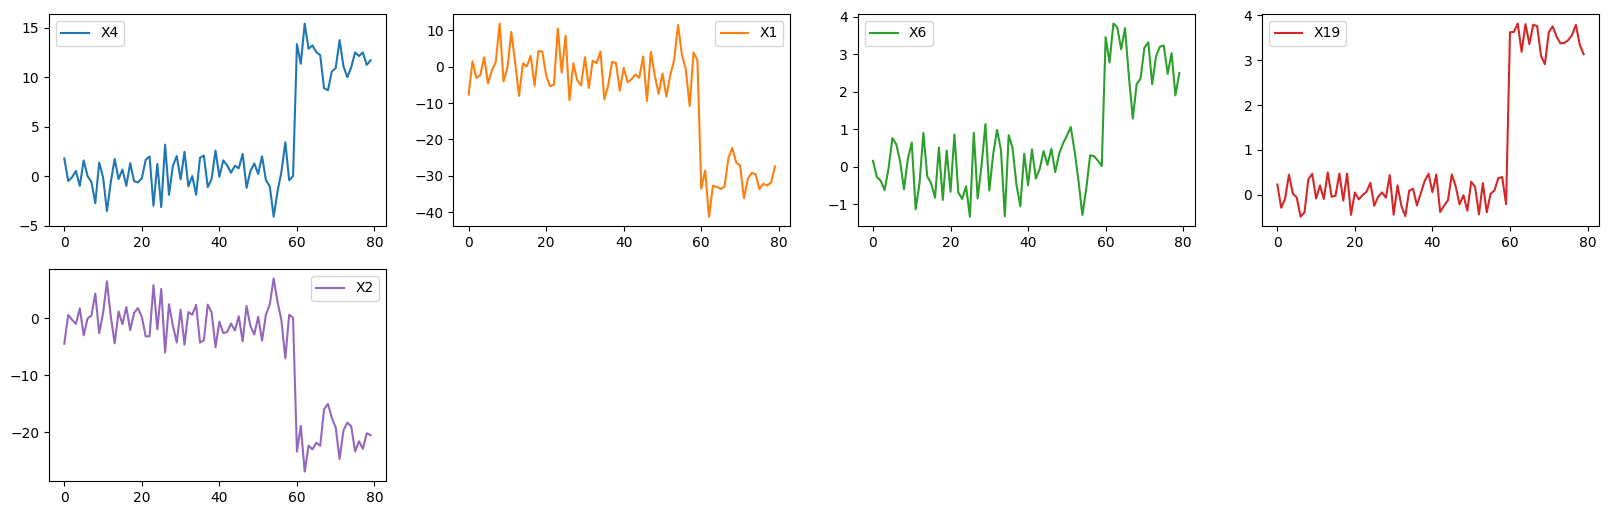

In [50]:
from metricsifter.sifter import Sifter

sifter = Sifter(n_jobs=-1)
siftered_data = sifter.run(data=data)
print("removed metrics:", set(data.columns) - set(siftered_data.columns))
siftered_data.plot(subplots=True, figsize=(20, 16), kind='line', layout=(5, 4), sharex=False, sharey=False)
